In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def on_trackbar(val):
    # This function gets called whenever the trackbar position changes
    # Retrieve the current positions of the lower and upper trackbars
    lower_thresh = cv2.getTrackbarPos('Lower Threshold', 'Binary Threshold')
    upper_thresh = cv2.getTrackbarPos('Upper Threshold', 'Binary Threshold')
    
    # Re-apply the threshold with the new values
    _, thresh = cv2.threshold(gray_focus, lower_thresh, upper_thresh, cv2.THRESH_BINARY)
    
    # Display the updated binary image
    cv2.imshow('Binary Threshold', thresh)

#  Read the image
img = cv2.imread('C:\\Users\\HP-OMEN\\Documents\\Spring 2024\\Independent Study\\KleinKill_Still.jpg')

# Binarize the image
color = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(color, cv2.COLOR_RGB2GRAY)
gray_focus = gray[400:,:].copy()

# Initial threshold values
initial_lower_thresh = 180
initial_upper_thresh = 200

# Create a window to display the image
cv2.namedWindow('Binary Threshold')

# Create trackbars for lower and upper threshold
cv2.createTrackbar('Lower Threshold', 'Binary Threshold', initial_lower_thresh, 255, on_trackbar)
cv2.createTrackbar('Upper Threshold', 'Binary Threshold', initial_upper_thresh, 255, on_trackbar)

# Initial call to display the image
on_trackbar(0) # The value 0 here is just a placeholder and doesn't affect the function logic

# Wait until a key is pressed and close all windows
cv2.waitKey(0)
cv2.destroyAllWindows()


error: OpenCV(4.8.1) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:866: error: (-215:Assertion failed) trackbar in function 'cv::getTrackbarPos'


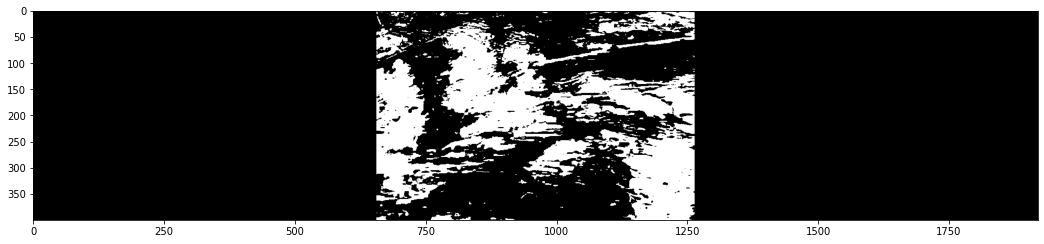

In [13]:
img = cv2.imread('C:\\Users\\HP-OMEN\\Documents\\Spring 2024\\Independent Study\\KleinKill_Still.jpg')

# Binarize the image
color = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(color, cv2.COLOR_RGB2GRAY)


thresh = cv2.threshold(gray, 133, 155, cv2.THRESH_BINARY)[1]
thresh_focus = thresh[350:750,:].copy()
plt.figure(figsize=(18,18))
plt.imshow(thresh_focus, cmap = "gray")


In [34]:
# Define a kernel using getStructuringElement
kernel_size = 3  # You can adjust the kernel size as needed
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (kernel_size, kernel_size))

# Perform erosion
erosion = cv2.erode(thresh_focus, kernel, iterations=1)

#Perform Dilation
dilation = cv2.dilate(erosion, kernel, iterations=2)

# Apply Canny edge detection
edges = cv2.Canny(dilation, 100,125)

# Find contours
contours, hierarchy = cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# # Create a black image for drawing contours
contour_img = np.zeros((img.shape[0], img.shape[1]), dtype=np.uint8)

# # Draw contours on the black image
cv2.drawContours(contour_img, contours, -1, (255, 255, 255), 1)

# Define a kernel using getStructuringElement
kernel_size = 1  # You can adjust the kernel size as needed
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (kernel_size, kernel_size))

#Perform Dilation
dilation2 = cv2.dilate(contour_img, kernel, iterations=1)

# Save or display the result
cv2.imwrite('processed_image.jpg', dilation2)
# cv2.imshow('Eroded Image', thresh)
cv2.waitKey(0)
cv2.destroyAllWindows()

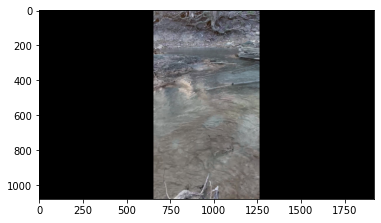

In [8]:
plt.imshow(img)

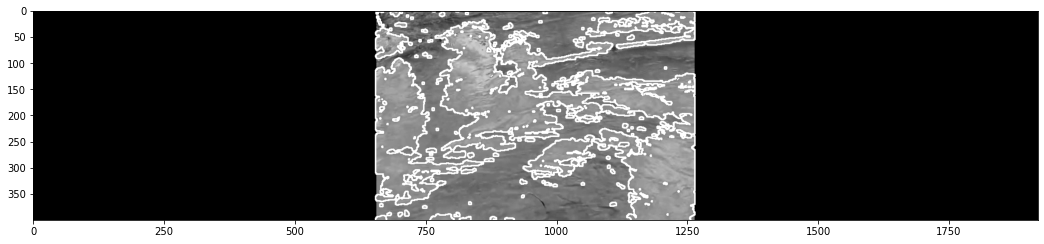

In [40]:
import copy

overlay_img = gray[350:750,:].copy()
for i in range(len(contours)):
    # print(f"Contour {i}: Next: {hierarchy[0][i][0]}, Prev: {hierarchy[0][i][1]}, Child: {hierarchy[0][i][2]}, Parent: {hierarchy[0][i][3]}")
    
    # Filter contours based on their hierarchy
    if hierarchy[0][i][3] == -1:
        # This is an outermost contour
        cv2.drawContours(overlay_img, contours, i, (255, 0, 0), 2)
    # elif hierarchy[0][i][3] == 0:
    #     # This is a contour with no parent
    #     cv2.drawContours(overlay_img, contours, i, (0, 255, 0), 2)
    # else:
    #     # This is a child contour
    #     cv2.drawContours(overlay_img, contours, i, (0, 0, 255), 2)

plt.figure(figsize=(18,18))
cv2.imwrite('overlaid_pattern.jpg', overlay_img)
plt.imshow(overlay_img,cmap = "gray")

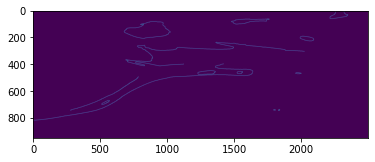

In [39]:
overlay_img = gray[800:1750,0:2500].copy()

#  Filter out small contours

# Mike Questions!
# Why are my large contours filtered out when I increase the min contour area?
# What's the best way to find the longest contour?

# draw a bounding box and calculate area from scratch 
# x,y, w,h  => cv2.boundingrect(contour)

min_contour_area = 50 #area takes into account inner contours
contours_large = []
for cnt in contours:
    area = cv2.contourArea(cnt)
    if area > min_contour_area:
        contours_large.append(cnt)

# Create a black image for drawing contours
contour_img = np.zeros((overlay_img.shape[0], overlay_img.shape[1]), dtype=np.uint8)

# Draw contours on the black image
cv2.drawContours(contour_img, contours_large, -1, (255, 255, 255), 1)
plt.imshow(contour_img)
# cv2.drawContours(overlay_img, contours,35, (255, 0, 0), 10)
# plt.imshow(overlay_img)

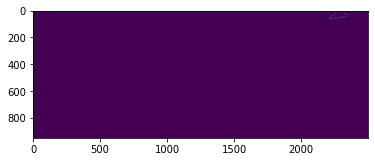

In [30]:
contour_img = np.zeros((overlay_img.shape[0], overlay_img.shape[1]), dtype=np.uint8)
cv2.drawContours(contour_img, contours_large, 21, (255, 255, 255), 1)
plt.imshow(contour_img)

In [16]:
#X time, Y amplitude 
for i in range(len(contours_large)):
    frequency_wave = contours_large[i]
    filename = "synth" + str(i) + ".txt"
    np.savetxt(filename, np.array(frequency_wave).reshape(-1,2), fmt='%d')